In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 맑은 고딕
# mpl.rcParams['font.family'] = 'AppleGothic'  # Mac의 애플고딕
# mpl.rcParams['font.family'] = 'NanumGothic'  # Linux 환경의 나눔고딕

# 유니코드 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False

In [122]:
# 데이터 불러오기
business_df = pd.read_csv('5.1 사업체 수정.csv')
ev_df = pd.read_csv('4. 서울시_전기차(15-24 12월기준).csv')

In [123]:
# '5.1 사업체 수정'의 자치구, 연도 컬럼과 '4. 서울시_전기차'의 시군구, 년 컬럼 병합 기준 설정
merged_df = pd.merge(business_df, ev_df, left_on=['자치구', '연도'], right_on=['시군구', '년'], how='left')

In [124]:
# 병합된 데이터 확인
print(merged_df)

     자치구    연도  건설업_사업체수  공공행정 국방 및 사회보장 행정_사업체수 광업_사업체수  교육 서비스업_사업체수  \
0    강남구  2017    2071.0                    57.0       3        3850.0   
1    강남구  2018    1931.0                    56.0       6        3838.0   
2    강남구  2019    1809.0                    58.0       3        3903.0   
3    강남구  2020    3399.0                    59.0       6        5285.0   
4    강남구  2021    3222.0                    58.0       6        5459.0   
..   ...   ...       ...                     ...     ...           ...   
195  중랑구  2020    4409.0                    47.0       1        1078.0   
196  중랑구  2021    4644.0                    47.0       2        1151.0   
197  중랑구  2022    4763.0                    46.0       2        1203.0   
198  중랑구  2023    4704.0                    46.0     NaN        1177.0   
199  중랑구  2024    4704.0                    46.0     NaN        1177.0   

     금융 및 보험업_사업체수 농업 임업 및 어업_사업체수  도매 및 소매업_사업체수  보건업 및 사회복지 서비스업_사업체수  ...  \
0           1951.0             

In [125]:
# 불필요한 열 삭제
merged_df = merged_df.drop(columns=['Unnamed: 0', '시군구', '년','산업대분류별(1)_종사자수'])

                              건설업_사업체수  공공행정 국방 및 사회보장 행정_사업체수   광업_사업체수  \
건설업_사업체수                      1.000000                0.221033  0.024014   
공공행정 국방 및 사회보장 행정_사업체수        0.221033                1.000000  0.467760   
광업_사업체수                       0.024014                0.467760  1.000000   
교육 서비스업_사업체수                  0.347194                0.212866  0.418555   
금융 및 보험업_사업체수                 0.668639                0.445139  0.498174   
농업 임업 및 어업_사업체수               0.422503                0.326520  0.389456   
도매 및 소매업_사업체수                 0.285445                0.579595  0.468688   
보건업 및 사회복지 서비스업_사업체수          0.342934                0.248584  0.482787   
부동산업_사업체수                     0.415081                0.357571  0.631402   
사업시설 관리 사업 지원 및 임대 서비스업_사업체수  0.492939                0.521578  0.660656   
산업대분류별(1)_사업체수                     NaN                     NaN       NaN   
수도 하수 및 폐기물 처리 원료 재생업_사업체수    0.516678                0.079668 -0.059214   
숙박 및 음식점업_사업

C:\Users\dyj02\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


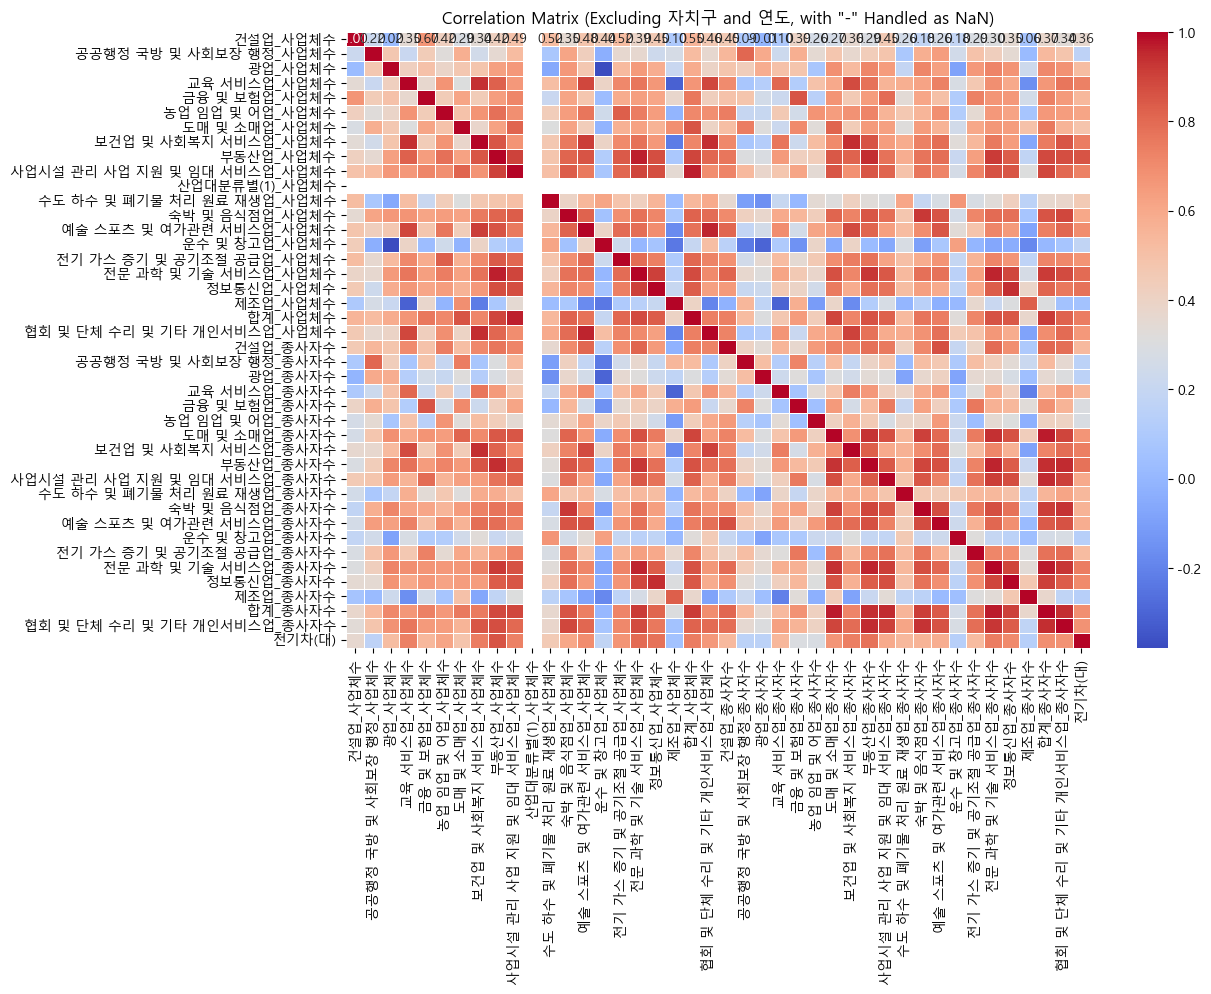

In [126]:
# '-' 기호를 결측치(NaN)로 변환
merged_df.replace('-', pd.NA, inplace=True)

# '자치구' 열을 문자열로 변환
merged_df['자치구'] = merged_df['자치구'].astype(str)

# '자치구'와 '연도' 데이터를 별도로 저장
location_year_data = merged_df[['자치구', '연도']]

# '자치구'와 '연도' 열 제거
filtered_df = merged_df.drop(columns=['자치구', '연도'])

# 숫자로 변환 가능하도록 처리: 문자열 데이터를 NaN으로 변환
for column in filtered_df.columns:
    filtered_df[column] = pd.to_numeric(filtered_df[column], errors='coerce')

# '자치구'별로 그룹화 후 결측치를 해당 구의 평균값으로 대체
filtered_df = filtered_df.groupby(merged_df['자치구'], group_keys=False).apply(
    lambda group: group.fillna(group.mean().round())
)

# 상관관계 계산
correlation_matrix = filtered_df.corr()

# 상관행렬 출력
print(correlation_matrix)

# 전기차(대)와 다른 변수들 간의 상관관계 추출
correlation_with_target = correlation_matrix['전기차(대)'].sort_values(ascending=False)

# 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 시각화 표시
plt.title('Correlation Matrix (Excluding 자치구 and 연도, with "-" Handled as NaN)')
plt.show()


In [127]:
# 전기차(대)와 다른 변수들 간의 상관관계를 내림차순으로 정렬
correlation_with_target = correlation_matrix['전기차(대)'].sort_values(ascending=False)

# 상관관계 출력
print("전기차(대)와 다른 변수들의 상관관계 (내림차순):")
print(correlation_with_target)

전기차(대)와 다른 변수들의 상관관계 (내림차순):
전기차(대)                          1.000000
부동산업_사업체수                       0.859358
전문 과학 및 기술 서비스업_사업체수            0.800657
부동산업_종사자수                       0.774470
정보통신업_사업체수                      0.774126
보건업 및 사회복지 서비스업_사업체수            0.744891
합계_사업체수                         0.742293
전문 과학 및 기술 서비스업_종사자수            0.741722
보건업 및 사회복지 서비스업_종사자수            0.737098
교육 서비스업_사업체수                    0.734585
사업시설 관리 사업 지원 및 임대 서비스업_사업체수    0.732860
정보통신업_종사자수                      0.707673
예술 스포츠 및 여가관련 서비스업_사업체수         0.693637
합계_종사자수                         0.690965
협회 및 단체 수리 및 기타 개인서비스업_종사자수     0.677099
전기 가스 증기 및 공기조절 공급업_사업체수        0.673803
도매 및 소매업_종사자수                   0.670252
협회 및 단체 수리 및 기타 개인서비스업_사업체수     0.659821
농업 임업 및 어업_사업체수                 0.616234
숙박 및 음식점업_사업체수                  0.602822
사업시설 관리 사업 지원 및 임대 서비스업_종사자수    0.594091
예술 스포츠 및 여가관련 서비스업_종사자수         0.582292
숙박 및 음식점업_종사자수                  0.560069
교육 서비스업_종사자수                

In [128]:
high_correlation_vars = correlation_with_target[correlation_with_target > 0.5].index

# 상관관계가 0.5보다 큰 변수들만 선택하여 새로운 데이터프레임 생성
filtered_high_corr_df = filtered_df[high_correlation_vars]

# 결과 출력
print("상관관계가 0.5보다 큰 변수들:")
print(filtered_high_corr_df.head())

상관관계가 0.5보다 큰 변수들:
   전기차(대)  부동산업_사업체수  전문 과학 및 기술 서비스업_사업체수  부동산업_종사자수  정보통신업_사업체수  \
0    2385     5686.0                8798.0    29287.0      4662.0   
1    4262     5779.0                9090.0    29039.0      4483.0   
2    5756     6027.0                8842.0    30802.0      4199.0   
3    7495    11363.0               17293.0    42946.0      9237.0   
4   11432    11054.0               15966.0    39253.0      9240.0   

   보건업 및 사회복지 서비스업_사업체수   합계_사업체수  전문 과학 및 기술 서비스업_종사자수  보건업 및 사회복지 서비스업_종사자수  \
0                3057.0   72511.0              103202.0               39254.0   
1                3048.0   71373.0              107675.0               41288.0   
2                3042.0   71027.0              110363.0               42029.0   
3                3467.0  115054.0              138557.0               47305.0   
4                3522.0  110007.0              133910.0               47080.0   

   교육 서비스업_사업체수  ...  숙박 및 음식점업_사업체수  사업시설 관리 사업 지원 및 임대 서비스업_종사자수  \
0        

In [129]:
# '자치구'와 '연도' 열을 다시 붙이기
result_df = pd.concat([location_year_data.reset_index(drop=True), filtered_high_corr_df.reset_index(drop=True)], axis=1)

In [130]:
result_df=result_df.drop(columns=['농업 임업 및 어업_사업체수','광업_사업체수'])

In [131]:
result_df.to_csv("사업체 수 & 전기차 수 관계 수정본.csv", index=False)

In [76]:
# merged_df.to_csv('sample.csv',index=False)

In [77]:
#grouped_df = merged_df[['자치구']].copy()

In [78]:
#filtered_df = merged_df.drop(columns=['자치구', '연도'])

In [79]:
# '-' 기호를 결측치(NaN)로 변환
merged_df.replace('-', pd.NA, inplace=True)

In [80]:
# '자치구'를 문자열로 변환
merged_df['자치구'] = merged_df['자치구'].astype(str)

In [82]:
# 데이터 타입 확인
print(merged_df.dtypes)


자치구                              object
연도                                int64
건설업_사업체수                        float64
공공행정 국방 및 사회보장 행정_사업체수          float64
광업_사업체수                          object
교육 서비스업_사업체수                    float64
금융 및 보험업_사업체수                   float64
농업 임업 및 어업_사업체수                  object
도매 및 소매업_사업체수                   float64
보건업 및 사회복지 서비스업_사업체수            float64
부동산업_사업체수                       float64
사업시설 관리 사업 지원 및 임대 서비스업_사업체수    float64
산업대분류별(1)_사업체수                  float64
수도 하수 및 폐기물 처리 원료 재생업_사업체수      float64
숙박 및 음식점업_사업체수                  float64
예술 스포츠 및 여가관련 서비스업_사업체수         float64
운수 및 창고업_사업체수                   float64
전기 가스 증기 및 공기조절 공급업_사업체수         object
전문 과학 및 기술 서비스업_사업체수            float64
정보통신업_사업체수                      float64
제조업_사업체수                        float64
합계_사업체수                         float64
협회 및 단체 수리 및 기타 개인서비스업_사업체수     float64
건설업_종사자수                        float64
공공행정 국방 및 사회보장 행정_종사자수          float64


In [83]:
for column in filtered_df.columns:
    print(f"{column}: {filtered_df[column].dtype}")

건설업_사업체수: float64
공공행정 국방 및 사회보장 행정_사업체수: float64
광업_사업체수: object
교육 서비스업_사업체수: float64
금융 및 보험업_사업체수: float64
농업 임업 및 어업_사업체수: object
도매 및 소매업_사업체수: float64
보건업 및 사회복지 서비스업_사업체수: float64
부동산업_사업체수: float64
사업시설 관리 사업 지원 및 임대 서비스업_사업체수: float64
산업대분류별(1)_사업체수: float64
수도 하수 및 폐기물 처리 원료 재생업_사업체수: float64
숙박 및 음식점업_사업체수: float64
예술 스포츠 및 여가관련 서비스업_사업체수: float64
운수 및 창고업_사업체수: float64
전기 가스 증기 및 공기조절 공급업_사업체수: object
전문 과학 및 기술 서비스업_사업체수: float64
정보통신업_사업체수: float64
제조업_사업체수: float64
합계_사업체수: float64
협회 및 단체 수리 및 기타 개인서비스업_사업체수: float64
건설업_종사자수: float64
공공행정 국방 및 사회보장 행정_종사자수: float64
광업_종사자수: object
교육 서비스업_종사자수: float64
금융 및 보험업_종사자수: float64
농업 임업 및 어업_종사자수: object
도매 및 소매업_종사자수: float64
보건업 및 사회복지 서비스업_종사자수: float64
부동산업_종사자수: float64
사업시설 관리 사업 지원 및 임대 서비스업_종사자수: float64
산업대분류별(1)_종사자수: float64
수도 하수 및 폐기물 처리 원료 재생업_종사자수: float64
숙박 및 음식점업_종사자수: float64
예술 스포츠 및 여가관련 서비스업_종사자수: float64
운수 및 창고업_종사자수: float64
전기 가스 증기 및 공기조절 공급업_종사자수: object
전문 과학 및 기술 서비스업_종사자수: float64
정보통신업_종사자수: 

In [81]:
# '자치구' 컬럼을 기준으로 그룹화하여 각 구별 평균값을 계산
# 결측치(NaN)가 있는 값은 각 구별로 해당 열의 평균으로 대체
merged_df = merged_df.groupby(merged_df['자치구'], group_keys=False).apply(
    lambda group: group.fillna(group.mean())
)

TypeError: can only concatenate str (not "int") to str

In [ ]:
# 상관관계 계산
correlation_matrix = merged_df.corr()

# 상관행렬 출력
print(correlation_matrix)

# 전기차(대)와 다른 변수들 간의 상관관계 추출
correlation_with_target = correlation_matrix['전기차(대)'].sort_values(ascending=False)

# 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 시각화 표시
plt.title('Correlation Matrix (Excluding 자치구 and 연도, with "-" Handled as NaN)')
plt.show()

# 전기차(대)와 다른 변수들 간의 상관관계 출력
print(correlation_with_target)